In [15]:
import cv2
import numpy as np
import os
import matplotlib
from matplotlib import pyplot as plt
import time
os.chdir("../images/")

def str_int_lex(m):
    if m<10: return "0"+str(m)
    return str(m)

# print(str_int_lex(9))

In [16]:
def filter_img(im, fil):
    fil = np.array(fil)     
    view_shape = tuple(np.subtract(im.shape, fil.shape) + 1) + fil.shape
    strd = np.lib.stride_tricks.as_strided 
    subM = strd(im, shape = view_shape, strides = im.strides * 2)   
    return np.einsum('ij,ijkl->kl',fil,subM.T).T

def filter_avg(im,k,efficient=True):
    n = k*k
    f = np.ones([k,k])/n
    img = np.array(im)
    h,w = img.shape
    d = int(k-1)
    m = int(d/2)
    imn = np.zeros([h+d,w+d])
    imn[m:h+m,m:w+m] = img[:,:]
    img_new = np.zeros([h,w])
    start = time.time()
    if(efficient):
        img_new = filter_img(img,f)
    else:
        for i in np.arange(m,h+m):
            for j in np.arange(m,w+m):
                img_n = imn[i-m:i+m+1,j-m:j+m+1]
                p = np.multiply(img_n,f)
                img_new[i-m,j-m] = np.sum(p)
        img_new = np.floor(img_new).astype('uint8')
    end = time.time()
    duration = end - start
    return duration, img_new

In [17]:
test_path = ["input_data/11thDoctor_1024x768.jpg", "input_data/11thDoctor_2048x1536.jpg", "input_data/11thDoctor_800x600.jpg", "input_data/11thDoctor_1600x1200.jpg"]

eeft_1 = []
neft_1 = []

x = range(3,14,2)

for j in range(4):
    img = cv2.imread(test_path[j])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    filt_eeft = []
    filt_neft = []
    for i in x:
        print("k:",i)
        t,new_im = filter_avg(img,i)
        cv2.imwrite("output_data/Q1/Q1_2/test_avg_eeft_" + str(j) + "_" + str_int_lex(i) + ".jpg",new_im)
        filt_eeft.append(t)
        t,new_im = filter_avg(img,i,efficient=False)
        cv2.imwrite("output_data/Q1/Q1_1/test_avg_neft_" + str(j) + "_" + str_int_lex(i) + ".jpg",new_im)
        filt_neft.append(t)
    eeft_1.append(filt_eeft)
    neft_1.append(filt_neft)

k: 3
k: 5
k: 7
k: 9
k: 11
k: 13
k: 3
k: 5
k: 7
k: 9
k: 11
k: 13
k: 3
k: 5
k: 7
k: 9
k: 11
k: 13
k: 3
k: 5
k: 7
k: 9
k: 11
k: 13


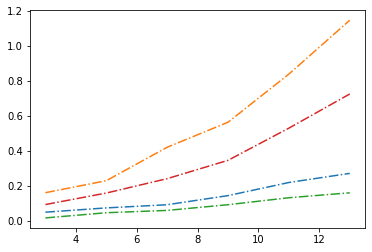

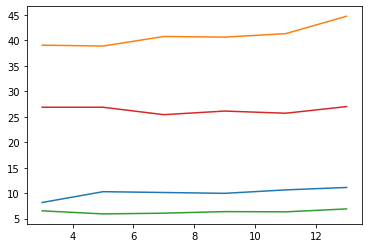

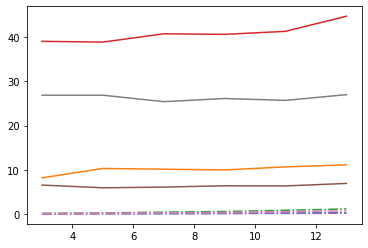

In [18]:
plot_marker_e = ['-.g','-.b','-.y','-.c']
plot_marker_n = ['--g','--b','--y','--c']

for k in range(4):
    plt.plot(x,eeft_1[k],plot_marker_e[k])
plt.show()

for k in range(4):
    plt.plot(x,neft_1[k],plot_marker_n[k])
plt.show()

for k in range(4):
    plt.plot(x,eeft_1[k],plot_marker_e[k])
    plt.plot(x,neft_1[k],plot_marker_n[k])
plt.show()

In [19]:
def median_filter(im, k):
    #fil = np.array()     
    view_shape = tuple(np.subtract(im.shape, (k,k)) + 1) + (k,k)
    strd = np.lib.stride_tricks.as_strided 
    subM = strd(im, shape = view_shape, strides = im.strides * 2)   
    return np.median(subM,axis=(2,3))

def run_median_filter(im,k,efficient=True):
    start = time.time()
    if efficient:
        filtered_im = median_filter(im,k)
    else:
        w,h = im.shape
        filtered_im = np.zeros(im.shape)
        for i in range(k//2,w-k//2):
            for j in range(k//2,h-k//2):
                filtered_im[i,j] = np.median(im[i-k//2:i+k//2 +1,j-k//2:j+k//2 + 1])
    end = time.time()
    duration = end - start
    return duration, filtered_im

In [20]:
test_path = ["input_data/11thDoctor_1024x768.jpg", "input_data/11thDoctor_2048x1536.jpg", "input_data/11thDoctor_800x600.jpg", "input_data/11thDoctor_1600x1200.jpg"]

eeft_2 = []
neft_2 = []

x = range(3,14,2)

for j in range(len(test_path)):
    img = cv2.imread(test_path[j])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    filt_eeft = []
    filt_neft = []
    for i in x:
        print("k:",i)
        t,new_im = run_median_filter(img,i)
        cv2.imwrite("output_data/Q1/Q1_4/test_med_eeft_" + str(j) + "_" + str_int_lex(i) + ".jpg",new_im)
        filt_eeft.append(t)
        t,new_im = run_median_filter(img,i,efficient=False)
        cv2.imwrite("output_data/Q1/Q1_3/test_med_neft_" + str(j) + "_" + str_int_lex(i) + ".jpg",new_im)
        filt_neft.append(t)
    eeft_2.append(filt_eeft)
    neft_2.append(filt_neft)

k: 3
k: 5
k: 7
k: 9
k: 11
k: 13
k: 3
k: 5
k: 7
k: 9
k: 11
k: 13
k: 3
k: 5
k: 7
k: 9
k: 11
k: 13
k: 3
k: 5
k: 7
k: 9
k: 11
k: 13


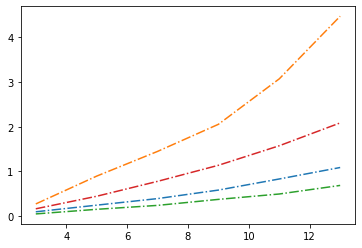

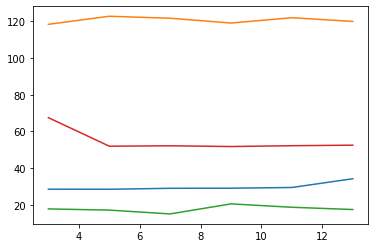

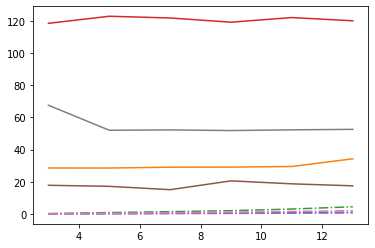

In [21]:
for k in range(len(test_path)):
    plt.plot(x,eeft_2[k],'-.')
plt.show()

for k in range(len(test_path)):
    plt.plot(x,neft_2[k])
plt.show()

for k in range(len(test_path)):
    plt.plot(x,eeft_2[k],'-.')
    plt.plot(x,neft_2[k])
plt.show()

In [22]:
img_path = "input_data/Noisy.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

t,new_im = run_median_filter(img,5)

In [23]:
cv2.imwrite('output_data/Q1/Q1_5/Noisy_Processed.jpg',new_im)

True